In [31]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import copy
from tqdm import tqdm

from EightBitTransit.cTransitingImage import TransitingImage
from EightBitTransit.inversion import *
from EightBitTransit.misc import *

%matplotlib inline

/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


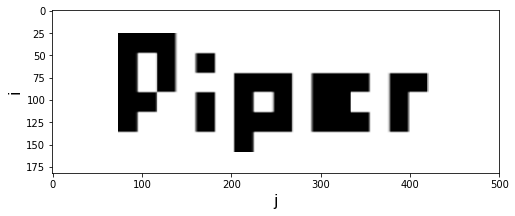

(182, 500)


/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


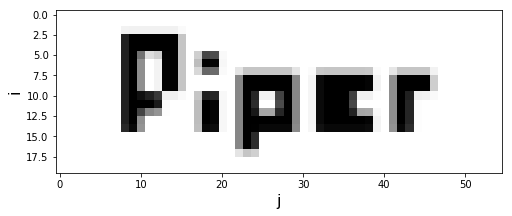

(20, 55)


In [5]:
times = np.linspace(-35.,35.,500)

# create a TransitingImage object, which reads in an image file and converts it into a matrix of pixels
# transiting the star at velocity v [days**-1], with reference time t_ref [days]
SItitle = TransitingImage(imfile="Piper.png",
                          v=0.4,
                          t_ref=0.,
                          t_arr=times)
SItitle.plot_grid()
print np.shape(SItitle.opacitymat) # the pixelated image grid. Notice that this is very high-resolution, so the 
                                   # light curve calculation in the next cell would be slow.

# We can speed up the light curve calculation by specifying a lower image resolution, e.g. 20 pixels in height.
# The image aspect ratio will not change.
lowres_SItitle = TransitingImage(imfile="Piper.png",
                                 lowres=20,
                                 lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                 lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                 v=0.4,
                                 t_ref=0.,
                                 t_arr=times)
lowres_SItitle.plot_grid()
print np.shape(lowres_SItitle.opacitymat)

In [6]:
# Calculate the light curve for this object. This function returns two arrays:
#    overlapTimes = the time steps at which the image grid has nonzero overlap with the star, given your choice of times and v;
#    SItitle_LC = array of relative fluxes at those time steps
lowres_SItitle_LC, overlapTimes = lowres_SItitle.gen_LC(t_arr=times) 

/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


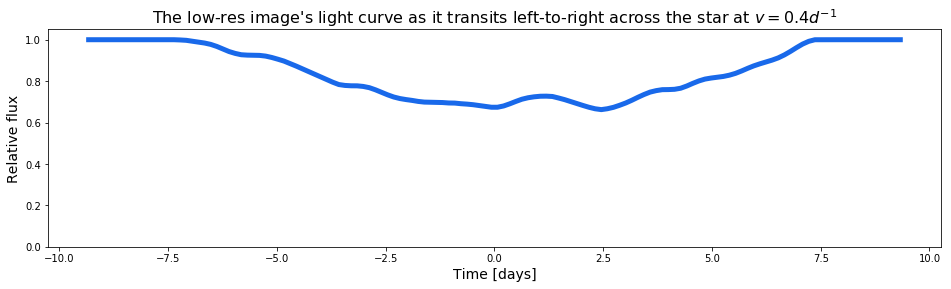

In [7]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
ax.plot(overlapTimes,lowres_SItitle_LC,color="#1969ea",ls="-",lw=5)
ax.set_ylim(0.0,1.05)
plt.xlabel("Time [days]",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"The low-res image's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
plt.show()

In [86]:
i = 1
# names has 15 items
# artifacts has 10
while i < 16:
    times = np.linspace(-35.,35.,500)

    # create a TransitingImage object, which reads in an image file and converts it into a matrix of pixels
    # transiting the star at velocity v [days**-1], with reference time t_ref [days]
#     SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/EightBitTransit/names/"+str(i)+".png",
#                               v=0.4,
#                               t_ref=0.,
#                               t_arr=times)
    #SItitle.plot_grid()
    #print np.shape(SItitle.opacitymat) # the pixelated image grid. Notice that this is very high-resolution, so the 
                                       # light curve calculation in the next cell would be slow.

    # We can speed up the light curve calculation by specifying a lower image resolution, e.g. 20 pixels in height.
    # The image aspect ratio will not change.
    lowres_SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/EightBitTransit/names/"+str(i)+".png",
                                     lowres=20,
                                     lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                     lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                     v=0.4,
                                     t_ref=0.,
                                     t_arr=times)
    #lowres_SItitle.plot_grid()
    #print np.shape(lowres_SItitle.opacitymat)
    
    lowres_SItitle_LC, overlapTimes = lowres_SItitle.gen_LC(t_arr=times) 
    
    fig, ax = plt.subplots(1,1,figsize=(16,4))
    ax = plt.axes()
    ax.plot(overlapTimes,lowres_SItitle_LC,color="#1969ea",ls="-",lw=5)
    ax.set_ylim(0.0,1.2)
    plt.xlabel("Time [days]",fontsize=14)
    plt.ylabel("Relative flux",fontsize=14)
    plt.title(r"The low-res image's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
    ax1 = plt.axes([.095, .2, 0.3, 0.3])
    ax1.imshow(lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
    filename = "/Users/piperfrances/BSRC/EightBitTransit/results_names/"+str(i)
    plt.savefig(filename, fmt="png")
    #plt.show()
    plt.close()
    
    i += 1
    
    

/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


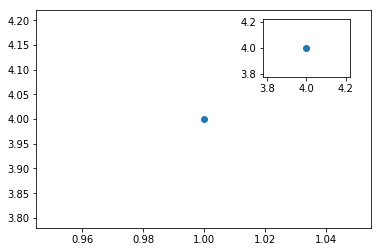

In [47]:
ax1 = plt.axes()  # standard axes
ax1.plot(1, 4, 'o')
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
ax2.plot(4, 4, 'o')